##### **Instructions**



In this exercise, we'll work with some Operation Transformation (OT) data generated within a repl. You should be familiar with OTs from the [OT Catchup](https://otcatchup.util.repl.co/) exercise.

You'll have **4 hours** to work on this assignment. You'll be able to reach us through Slack, and we **highly encourage you to ask questions** at any time, especially if you get stuck. Treat us as your teammates for the day!

Keep in mind that we value straightforward, working code over clever, not-quite-working code, even if there are more elaborate approaches out there. We're much more interested in your process and how you approach the problem. 


# Download file containing OT history 

Run the following to download the data that you'll be using for this project. The file will be saved locally in `/content/replit/ot-hist.txt` and you can preview it using the `head` command in bash.

In [1]:
! mkdir -p /content/replit && gdown -O /content/replit/ot-hist.txt "https://drive.google.com/uc?id=1p_YCXyxF9IXTRcfNIM_rON85d6VxcduW"

Downloading...
From: https://drive.google.com/uc?id=1p_YCXyxF9IXTRcfNIM_rON85d6VxcduW
To: /content/replit/ot-hist.txt
100% 52.0k/52.0k [00:00<00:00, 57.7MB/s]


In [2]:
! head /content/replit/ot-hist.txt

{"spookyVersion":1,"ops":[{"Op":{"Insert":"f"}}],"crc32":1993550816,"committed":{"seconds":1633731010,"nanos":601741473}}
{"spookyVersion":2,"ops":[{"Op":{"Skip":1}},{"Op":{"Insert":"rom"}}],"crc32":3105530224,"committed":{"seconds":1633731010,"nanos":733718180}}
{"spookyVersion":3,"ops":[{"Op":{"Skip":4}},{"Op":{"Insert":" "}}],"crc32":3117458648,"committed":{"seconds":1633731010,"nanos":861928438}}
{"spookyVersion":4,"ops":[{"Op":{"Skip":5}},{"Op":{"Insert":"c"}}],"crc32":2382910765,"committed":{"seconds":1633731011,"nanos":304150079}}
{"spookyVersion":5,"ops":[{"Op":{"Skip":6}},{"Op":{"Insert":"o"}}],"crc32":1247725412,"committed":{"seconds":1633731011,"nanos":735776039}}
{"spookyVersion":6,"ops":[{"Op":{"Skip":7}},{"Op":{"Insert":"l"}}],"crc32":3700636024,"committed":{"seconds":1633731011,"nanos":953209609}}
{"spookyVersion":7,"ops":[{"Op":{"Skip":8}},{"Op":{"Insert":"l"}}],"crc32":3355748553,"committed":{"seconds":1633731012,"nanos":133994353}}
{"spookyVersion":8,"ops":[{"Op":{"Sk

##### **Frequently Asked Questions**

**What is `crc32`?**

[CRC32](https://en.wikipedia.org/wiki/Cyclic_redundancy_check) is a super quick and dirty opaque value that acts as a consistency check on OT documents. 

They have the property that if two documents have the same crc32, it is *likely* (not certain) that they have the same contents. On the other hand, if they have a *different* crc32, they **definitely** have different contents. Since they are opaque values, they can only be tested for equality / inequality. No other operations are valid to perform on them (less than, more than, add, subtract, divide, etc).

# Data wrangling

#### **Import the file `ot-hist.txt` into a dataframe**


In [94]:
import pandas as pd

In [95]:
pd.set_option('display.max_columns', None)
ot_hist_df = pd.read_json('/content/replit/ot-hist.txt', lines=True) 
ot_hist_df

,spookyVersion,ops,crc32,committed
0,1,[{'Op': {'Insert': 'f'}}],1993550816,"{'seconds': 1633731010, 'nanos': 601741473}"
1,2,"[{'Op': {'Skip': 1}}, {'Op': {'Insert': 'rom'}}]",3105530224,"{'seconds': 1633731010, 'nanos': 733718180}"
2,3,"[{'Op': {'Skip': 4}}, {'Op': {'Insert': ' '}}]",3117458648,"{'seconds': 1633731010, 'nanos': 861928438}"
3,4,"[{'Op': {'Skip': 5}}, {'Op': {'Insert': 'c'}}]",2382910765,"{'seconds': 1633731011, 'nanos': 304150079}"
4,5,"[{'Op': {'Skip': 6}}, {'Op': {'Insert': 'o'}}]",1247725412,"{'seconds': 1633731011, 'nanos': 735776039}"
...,...,...,...,...
356,357,"[{'Op': {'Skip': 237}}, {'Op': {'Insert': '()'}}]",2275078666,"{'seconds': 1634269084, 'nanos': 692628151}"
357,358,"[{'Op': {'Skip': 238}}, {'Op': {'Insert': 'g'}}]",504915590,"{'seconds': 1634269097, 'nanos': 602492323}"
358,359,"[{'Op': {'Skip': 239}}, {'Op': {'Insert': 'o'}}]",844538129,"{'seconds': 1634269097, 'nanos': 784863199}"
359,360,"[{'Op': {'Skip': 240}}, {'Op': {'Insert': 't'}}]",4112982699,"{'seconds': 1634269097, 'nanos': 867816637}"


#### **For each row in the dataframe, construct the following as separate columns**

* The total number of ops
* The number of ops by type (Delete, Insert, or Skip)

In [96]:
# Total number of Ops
ot_hist_df['total_ops'] = ot_hist_df['ops'].apply(len)
print(ot_hist_df.head())

   spookyVersion                                               ops  \
0              1                         [{'Op': {'Insert': 'f'}}]   
1              2  [{'Op': {'Skip': 1}}, {'Op': {'Insert': 'rom'}}]   
2              3    [{'Op': {'Skip': 4}}, {'Op': {'Insert': ' '}}]   
3              4    [{'Op': {'Skip': 5}}, {'Op': {'Insert': 'c'}}]   
4              5    [{'Op': {'Skip': 6}}, {'Op': {'Insert': 'o'}}]   

        crc32                                    committed  total_ops  
0  1993550816  {'seconds': 1633731010, 'nanos': 601741473}          1  
1  3105530224  {'seconds': 1633731010, 'nanos': 733718180}          2  
2  3117458648  {'seconds': 1633731010, 'nanos': 861928438}          2  
3  2382910765  {'seconds': 1633731011, 'nanos': 304150079}          2  
4  1247725412  {'seconds': 1633731011, 'nanos': 735776039}          2  


In [97]:
# Just in case there are more Ops in the future
distinct_ops = set()
for opers in ot_hist_df['ops'].values:
    for op in opers:
        distinct_ops.add(list(op['Op'].keys())[0])
print(distinct_ops)

{'Skip', 'Insert', 'Delete'}


In [98]:
# Total number of Ops per Opt Type

def count_operations_by_type(line, op_type):
        count = 0
        for op in line:
            if list(op['Op'].keys())[0] == op_type:
                count += 1
        return count

for op_type in distinct_ops:
  ot_hist_df[f'{op_type.lower()}_ops'] = ot_hist_df['ops'].apply(lambda x: count_operations_by_type(x, op_type))
print(ot_hist_df.head())


   spookyVersion                                               ops  \
0              1                         [{'Op': {'Insert': 'f'}}]   
1              2  [{'Op': {'Skip': 1}}, {'Op': {'Insert': 'rom'}}]   
2              3    [{'Op': {'Skip': 4}}, {'Op': {'Insert': ' '}}]   
3              4    [{'Op': {'Skip': 5}}, {'Op': {'Insert': 'c'}}]   
4              5    [{'Op': {'Skip': 6}}, {'Op': {'Insert': 'o'}}]   

        crc32                                    committed  total_ops  \
0  1993550816  {'seconds': 1633731010, 'nanos': 601741473}          1   
1  3105530224  {'seconds': 1633731010, 'nanos': 733718180}          2   
2  3117458648  {'seconds': 1633731010, 'nanos': 861928438}          2   
3  2382910765  {'seconds': 1633731011, 'nanos': 304150079}          2   
4  1247725412  {'seconds': 1633731011, 'nanos': 735776039}          2   

   skip_ops  insert_ops  delete_ops  
0         0           1           0  
1         1           1           0  
2         1           1   

#### **Construct a time-series index for your dataframe**




In [99]:
# My time-series is based on Nanos
ot_hist_df['nanos'] = ot_hist_df['committed'].apply(lambda x: x['seconds']*1000000000 + x['nanos'])
ot_hist_df['seconds'] = ot_hist_df['committed'].apply(lambda x: x['seconds'])

print(ot_hist_df.head())


   spookyVersion                                               ops  \
0              1                         [{'Op': {'Insert': 'f'}}]   
1              2  [{'Op': {'Skip': 1}}, {'Op': {'Insert': 'rom'}}]   
2              3    [{'Op': {'Skip': 4}}, {'Op': {'Insert': ' '}}]   
3              4    [{'Op': {'Skip': 5}}, {'Op': {'Insert': 'c'}}]   
4              5    [{'Op': {'Skip': 6}}, {'Op': {'Insert': 'o'}}]   

        crc32                                    committed  total_ops  \
0  1993550816  {'seconds': 1633731010, 'nanos': 601741473}          1   
1  3105530224  {'seconds': 1633731010, 'nanos': 733718180}          2   
2  3117458648  {'seconds': 1633731010, 'nanos': 861928438}          2   
3  2382910765  {'seconds': 1633731011, 'nanos': 304150079}          2   
4  1247725412  {'seconds': 1633731011, 'nanos': 735776039}          2   

   skip_ops  insert_ops  delete_ops                nanos     seconds  
0         0           1           0  1633731010601741473  1633731010 

# Summary stats and visualization



#### **Calculate some basic summary statistics**

* Number of ops per second/minute
* Avg number of ops per crc
* Frequency of op types 
* Anything else you find interesting



In [100]:
max_seconds = ot_hist_df['seconds'].max()
min_seconds = ot_hist_df['seconds'].min()
total_seconds = max_seconds - min_seconds
total_minutes = total_seconds / 60
print(f"Total seconds elapsed {total_seconds}")
print(f"Total minutes elapsed {total_minutes}")
total_ops = ot_hist_df['total_ops'].sum()
print(f"Total ops : {total_ops}")
print(f"Ops per second: {total_ops/total_seconds}")
print(f"Ops per minute: {total_ops/total_minutes}")

Total seconds elapsed 4837175
Total minutes elapsed 80619.58333333333
Total ops : 740
Ops per second: 0.00015298185407805175
Ops per minute: 0.009178911244683105


In [102]:
average_ops_per_crc32 = ot_hist_df.groupby('crc32')['total_ops'].mean()
print(f"Average ops per CRC32: {average_ops_per_crc32}")

Average ops per CRC32: crc32
4149887       2.0
17724078      2.0
22229109      2.0
22819997      2.0
31902292      2.0
             ... 
4248948548    2.0
4266123516    2.0
4274111974    2.0
4281033019    2.5
4287781481    2.0
Name: total_ops, Length: 317, dtype: float64


In [90]:
for op_type in distinct_ops:
  print(f"Frequency of {op_type} per minute is {(ot_hist_df[f'{op_type.lower()}_ops'].sum())/total_minutes}")


Frequency of Skip per minute is 0.004477820215311623
Frequency of Insert per minute is 0.0039444510483908485
Frequency of Delete per minute is 0.0007566399809806344


#### **Create a time-series plot showing the number of ops over time by op type**
* Use any visualization library that you like
* The choice of frequency and window are up to you
* Feel free to include more than one plot

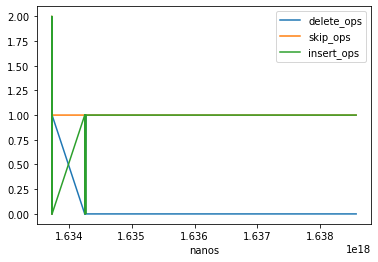

In [91]:
import matplotlib.pyplot as plt
ot_hist_df.plot(x='nanos', y=['delete_ops', 'skip_ops', 'insert_ops'])
plt.show()

# Version control using OT history


#### **Write a function that returns the document as of a specific point in time**
* The function should take in a date/time and return the document contents as of that time
* Feel free to use any of the code you wrote previously as part of the [OT-catchup](https://otcatchup.util.repl.co/) exercise



In [92]:
import pandas as pd

def apply_bundle_operation(bundle_operation, document):
    cursor = 0
    for entry in bundle_operation:
        operation = entry['Op']
        op_type = list(operation.keys())[0]
        if op_type == 'Skip':
            cursor = cursor + operation[op_type]
        elif op_type == 'Delete':
            document = document[:cursor]+document[cursor+operation[op_type]:]
        elif op_type == 'Insert':
            document = document[:cursor]+operation[op_type]+document[cursor:]
            cursor = cursor + len(operation[op_type])
    return document

def get_document_at_time(time_ns, df):
    df = df[df['nanos'] <= time_ns].sort_values(by='nanos', ascending=True)
    document = ""
    for bundle_operation in df['ops'].values:
        document = apply_bundle_operation(bundle_operation, document)
    return document

In [93]:
# Example of execution using the max value (to get the full document)
ot_hist_df = pd.read_json('/content/replit/ot-hist.txt', lines=True) 
ot_hist_df['nanos'] = ot_hist_df['committed'].apply(lambda x: x['seconds']*1000000000 + x['nanos'])
max_nanos_ts = ot_hist_df['nanos'].max()
print(get_document_at_time(int(max_nanos_ts), ot_hist_df))

from collections import defaultdict
import json

def tree(): return defaultdict(tree)
got = tree()

got['stark']['sigil'] = '🐺'
got['lannister']['sigil'] = '🦁'
got['targaryen']['sigil'] = '🐲'

print(json.dumps(got, indent=4))

json.dumps(got)



In [103]:
print(get_document_at_time(int(1633731011304150079), ot_hist_df))

from c


#### **[EXTRA CREDIT] Build a more user-friendly method for choosing from a list of document versions**
* Think of this as the menu of previous versions showed to you when editing a document (for example, in Google Docs) 
* The design and choice set presented to the user is up to you, but remember that fewer choices are often better for users
* Explain how you came up with your design and briefly mention its limitations (we will discuss during our follow-up session)


In [79]:
"""
I think that the best option is to use an Slider that will allow the user to select the version of the document that he wants.
That slider will be based on nanoseconds. Having the minimun nanosecond at the left of the slider and the max nanosecond at the right of the slider.
Something similar to: https://docs.streamlit.io/library/api-reference/widgets/st.slider

But I didn't have enough time to implement it properly. I can show some examples in my local IDE.
"""

import streamlit as st

from datetime import datetime
import pandas as pd
from dateutil import parser


def apply_bundle_operation(bundle_operation, document):
    cursor = 0
    for entry in bundle_operation:
        operation = entry['Op']
        op_type = list(operation.keys())[0]
        if op_type == 'Skip':
            cursor = cursor + operation[op_type]
        elif op_type == 'Delete':
            document = document[:cursor]+document[cursor+operation[op_type]:]
        elif op_type == 'Insert':
            document = document[:cursor]+operation[op_type]+document[cursor:]
            cursor = cursor + len(operation[op_type])
    return document

def get_document_at_time(time_ns):
    ot_hist_df = pd.read_json('ot-hist.txt', lines=True)
    ot_hist_df['seconds'] = ot_hist_df['committed'].apply(lambda x: x['seconds'])
    ot_hist_df['nanos'] = ot_hist_df['committed'].apply(lambda x: x['seconds'] * 1000000000 + x['nanos'])
    ot_hist_df = ot_hist_df[ot_hist_df['seconds'] <= time_ns].sort_values(by=['seconds','nanos'], ascending=True)
    document = ""
    for bundle_operation in ot_hist_df['ops'].values:
        document = apply_bundle_operation(bundle_operation, document)
    return document

def get_max_nanos_ts():
    ot_hist_df = pd.read_json('ot-hist.txt', lines=True)
    ot_hist_df['seconds'] = ot_hist_df['committed'].apply(lambda x: x['seconds'])
    max_nanos_ts = ot_hist_df['seconds'].max()
    return max_nanos_ts

def get_min_nanos_ts():
    ot_hist_df = pd.read_json('ot-hist.txt', lines=True)
    ot_hist_df['seconds'] = ot_hist_df['committed'].apply(lambda x: x['seconds'])
    min_nanos_ts = ot_hist_df['seconds'].min()
    return min_nanos_ts

def date_to_nanos(date):
    nanos_date = date.timestamp()
    return nanos_date

start_time = st.slider(
     "When do you start?",
     value=datetime.fromtimestamp(get_min_nanos_ts() ),
     min_value=datetime.fromtimestamp(get_min_nanos_ts() ),
     max_value=datetime.fromtimestamp(get_max_nanos_ts() ),
     format="YYYY/MM/DD - hh:mm:ss")
st.write("Document:", get_document_at_time(date_to_nanos(start_time)))


ModuleNotFoundError: ignored